# 🎯 Support Vector Machines: Finding the Best Boundaries!

**Welcome, Future Machine Learning Expert!**

Imagine you're a referee in a sports game, and your job is to draw a line on the field to separate two teams. You want to draw that line so that both teams have the **maximum possible room** on their side - giving everyone a fair buffer zone.

That's exactly what **Support Vector Machines (SVMs)** do! They find the **best possible boundary** between different classes of data by maximizing the margin (buffer zone) between them.

---

## 📚 What You'll Learn in This Notebook

1. **The Maximum Margin Concept** - Why SVMs find the "best" boundary
2. **Support Vectors** - The key players that define everything
3. **Hard Margin vs Soft Margin** - What if data isn't perfectly separable?
4. **The Kernel Trick** - The magic that handles curved boundaries
5. **Different Kernels** - Linear, Polynomial, and RBF
6. **Hyperparameters C and Gamma** - Tuning your SVM
7. **Multi-Class Classification** - More than two classes
8. **Practical Tips** - When and how to use SVMs effectively

---

## 🎨 Real-World Applications of SVMs

SVMs are used in many important applications:
- 🖼️ **Image Classification** - Recognizing objects, faces, handwritten digits
- 📝 **Text Categorization** - Spam detection, sentiment analysis
- 🧬 **Bioinformatics** - Cancer detection, protein classification
- 💹 **Financial Analysis** - Stock market prediction, credit scoring
- 🔬 **Scientific Research** - Particle physics, astronomy

Let's dive in! 🚀

---

# Part 1: Setting Up Our Workshop 🛠️

Let's import all the tools we'll need for our SVM journey!

In [1]:
# Import essential libraries
import numpy as np                    # For mathematical operations
import pandas as pd                   # For data handling
import matplotlib.pyplot as plt       # For creating visualizations
from matplotlib.colors import ListedColormap  # For colorful decision boundaries
from mpl_toolkits.mplot3d import Axes3D      # For 3D plots
import warnings
warnings.filterwarnings('ignore')     # Keep output clean

# Scikit-learn tools for SVM
from sklearn.svm import SVC           # Support Vector Classifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import make_blobs, make_circles, make_moons

# Make our graphs look nice
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 12

# Set random seed for reproducibility
np.random.seed(42)

print("✅ All tools are ready! Let's learn about Support Vector Machines!")

✅ All tools are ready! Let's learn about Support Vector Machines!


---

# Part 2: The Maximum Margin Concept 📏

## The Fundamental Question

When we want to separate two classes of data, there are often **infinitely many** lines (or boundaries) that could do the job. But which one is the **BEST**?

## The SVM Philosophy: Maximum Margin!

The **margin** is the distance between the decision boundary and the **nearest** data points from either class.

**SVM's Goal**: Find the boundary that **maximizes this margin**!

### Why Maximum Margin?

Think of it like building a road between two neighborhoods:
- A **narrow road** (small margin) means houses are very close to the road - any small error and you're in someone's yard!
- A **wide highway** (large margin) gives lots of buffer space - more room for error!

A larger margin means:
- Better **generalization** to new, unseen data
- More **robust** predictions (less sensitive to noise)
- Greater **confidence** in classifications near the boundary

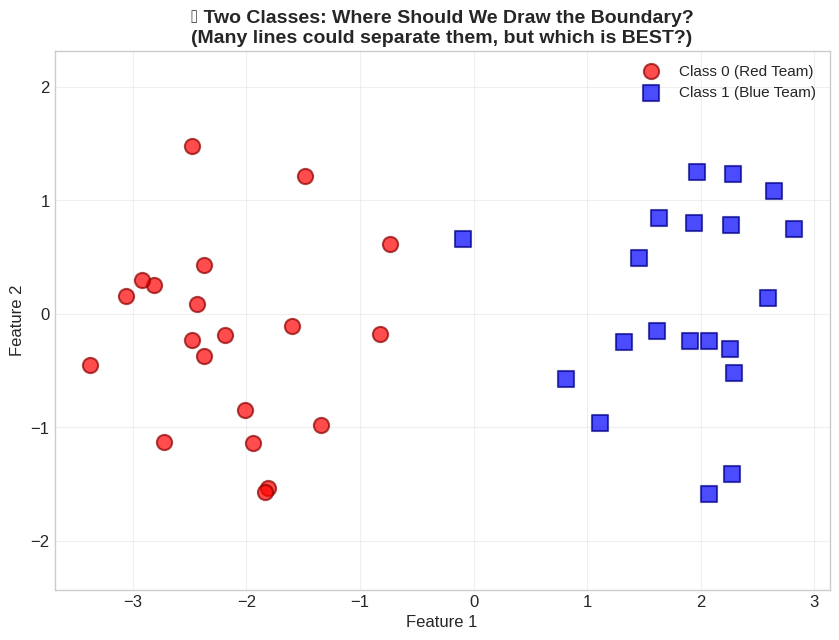


🤔 THE BIG QUESTION:
   Many different lines could separate these two classes.
   But which line is the BEST one to use?

   SVM's answer: The line that creates the MAXIMUM MARGIN!


In [2]:
# Let's create simple, linearly separable data to understand the maximum margin concept

np.random.seed(42)

# Create two clusters of points that are clearly separable
n_points = 20

# Class 0: Points on the left side (red team)
X_class0 = np.random.randn(n_points, 2) * 0.8 + np.array([-2, 0])

# Class 1: Points on the right side (blue team)
X_class1 = np.random.randn(n_points, 2) * 0.8 + np.array([2, 0])

# Combine the data
X_simple = np.vstack([X_class0, X_class1])
y_simple = np.array([0] * n_points + [1] * n_points)

# Visualize the data
plt.figure(figsize=(10, 7))
plt.scatter(X_class0[:, 0], X_class0[:, 1], s=120, c='red', marker='o',
            edgecolors='darkred', linewidth=1.5, label='Class 0 (Red Team)', alpha=0.7)
plt.scatter(X_class1[:, 0], X_class1[:, 1], s=120, c='blue', marker='s',
            edgecolors='darkblue', linewidth=1.5, label='Class 1 (Blue Team)', alpha=0.7)

plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.title('🎯 Two Classes: Where Should We Draw the Boundary?\n(Many lines could separate them, but which is BEST?)',
          fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.axis('equal')

plt.savefig('01_simple_separable_data.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n🤔 THE BIG QUESTION:")
print("   Many different lines could separate these two classes.")
print("   But which line is the BEST one to use?")
print("\n   SVM's answer: The line that creates the MAXIMUM MARGIN!")

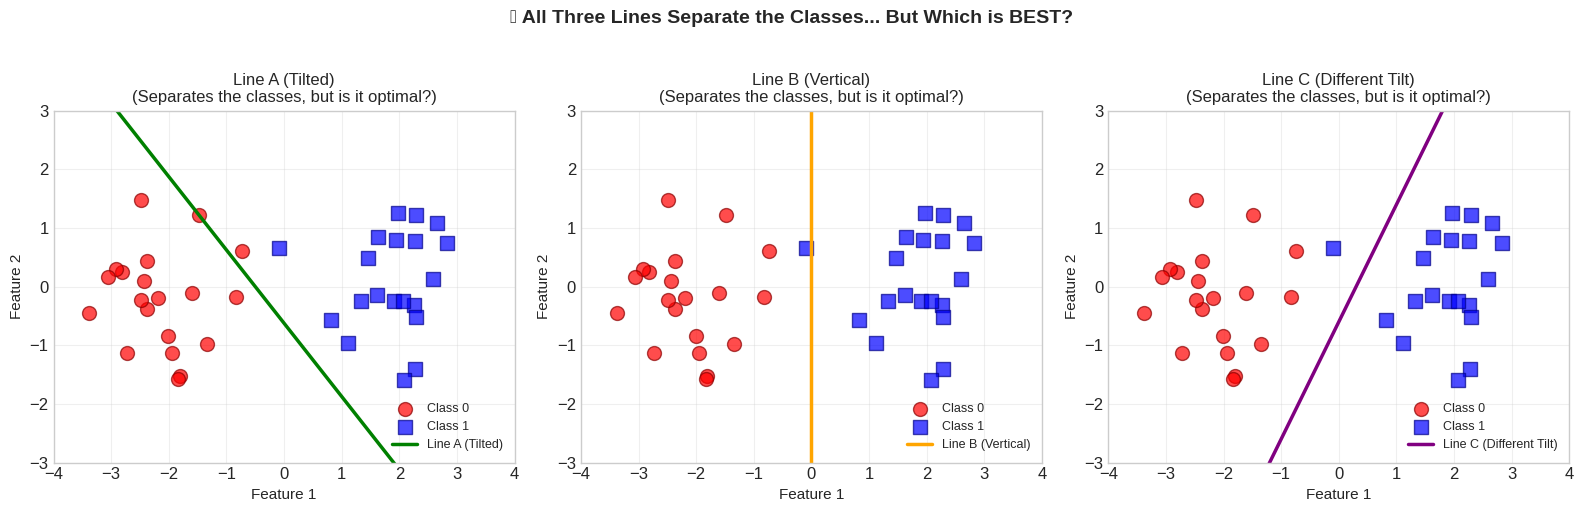


🔑 KEY INSIGHT:
   All three lines successfully separate the two classes.
   But they have different MARGINS (distances to the nearest points).

   SVM will find the line with the MAXIMUM margin!
   This gives us the most confident and robust classifier.


In [3]:
# Let's compare different possible boundaries to understand why margin matters!

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Define three different possible separating lines
# Line equation: w1*x1 + w2*x2 + b = 0
lines = [
    {'w1': 1, 'w2': 0.8, 'b': 0.5, 'name': 'Line A (Tilted)', 'color': 'green'},
    {'w1': 1, 'w2': 0, 'b': 0, 'name': 'Line B (Vertical)', 'color': 'orange'},
    {'w1': 1, 'w2': -0.5, 'b': -0.3, 'name': 'Line C (Different Tilt)', 'color': 'purple'}
]

x_range = np.linspace(-4, 4, 100)

for ax, line_info in zip(axes, lines):
    # Plot the data points
    ax.scatter(X_class0[:, 0], X_class0[:, 1], s=100, c='red', marker='o',
               edgecolors='darkred', alpha=0.7, label='Class 0')
    ax.scatter(X_class1[:, 0], X_class1[:, 1], s=100, c='blue', marker='s',
               edgecolors='darkblue', alpha=0.7, label='Class 1')

    # Calculate and plot the separating line
    # From w1*x1 + w2*x2 + b = 0, we get x2 = -(w1*x1 + b) / w2
    w1, w2, b = line_info['w1'], line_info['w2'], line_info['b']

    if abs(w2) > 0.01:  # If w2 is not too close to zero
        y_line = -(w1 * x_range + b) / w2
        ax.plot(x_range, y_line, color=line_info['color'], linewidth=2.5,
                label=line_info['name'])
    else:  # Vertical line
        ax.axvline(x=-b/w1, color=line_info['color'], linewidth=2.5,
                   label=line_info['name'])

    ax.set_xlabel('Feature 1', fontsize=11)
    ax.set_ylabel('Feature 2', fontsize=11)
    ax.set_title(f'{line_info["name"]}\n(Separates the classes, but is it optimal?)', fontsize=12)
    ax.set_xlim(-4, 4)
    ax.set_ylim(-3, 3)
    ax.legend(loc='lower right', fontsize=9)
    ax.grid(True, alpha=0.3)

plt.suptitle('❓ All Three Lines Separate the Classes... But Which is BEST?',
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('02_multiple_possible_boundaries.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n🔑 KEY INSIGHT:")
print("   All three lines successfully separate the two classes.")
print("   But they have different MARGINS (distances to the nearest points).")
print("\n   SVM will find the line with the MAXIMUM margin!")
print("   This gives us the most confident and robust classifier.")

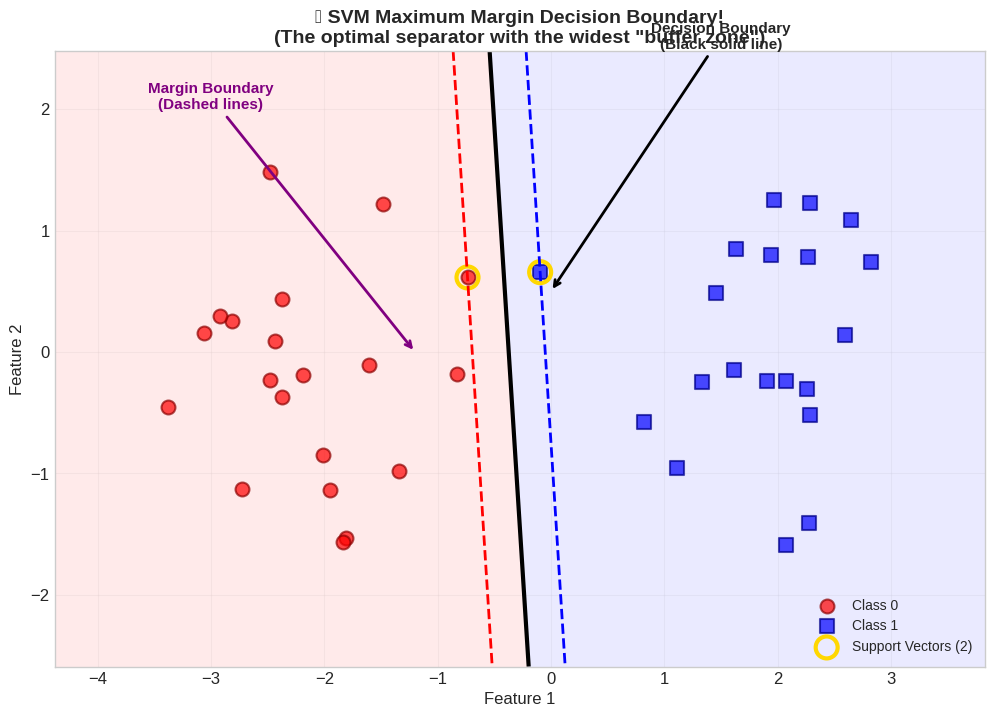


🎯 SVM RESULTS:
   ✓ Number of Support Vectors: 2
   ✓ These are the MOST IMPORTANT points - they define the boundary!

   📐 VISUAL GUIDE:
      • BLACK solid line = Decision Boundary (where predictions change)
      • DASHED lines = Margin Boundaries (the 'buffer zone')
      • GOLD circles = Support Vectors (the critical points)

   The MARGIN is the distance between the dashed lines!


In [4]:
# Now let's train an actual SVM and see the optimal maximum margin boundary!

# Train an SVM with a linear kernel (we'll explain kernels later)
# C=1000 makes it a "hard margin" SVM (more on this later too)
svm_linear = SVC(kernel='linear', C=1000)
svm_linear.fit(X_simple, y_simple)

def plot_svm_decision_boundary(model, X, y, ax=None, title='SVM Decision Boundary', show_margin=True):
    """
    Visualize an SVM's decision boundary, margin, and support vectors.

    This function creates a comprehensive visualization showing:
    - The decision boundary (where the model is 50-50 uncertain)
    - The margin boundaries (the "buffer zone")
    - The support vectors (the critical points that define everything)
    - The classification regions
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 7))

    # Create a mesh grid covering the data range
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    # Get the decision function values for each point in the grid
    # Decision function: positive = class 1, negative = class 0, zero = on boundary
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the classification regions (light colors)
    ax.contourf(xx, yy, Z, levels=[-100, 0, 100], colors=['#FFCCCC', '#CCCCFF'], alpha=0.4)

    if show_margin:
        # Plot the margin boundaries (dashed lines at decision_function = ±1)
        ax.contour(xx, yy, Z, levels=[-1, 0, 1], colors=['red', 'black', 'blue'],
                   linestyles=['--', '-', '--'], linewidths=[2, 3, 2])
    else:
        # Just plot the decision boundary
        ax.contour(xx, yy, Z, levels=[0], colors='black', linewidths=3)

    # Plot the data points
    ax.scatter(X[y==0, 0], X[y==0, 1], s=100, c='red', marker='o',
               edgecolors='darkred', linewidth=1.5, alpha=0.7, label='Class 0')
    ax.scatter(X[y==1, 0], X[y==1, 1], s=100, c='blue', marker='s',
               edgecolors='darkblue', linewidth=1.5, alpha=0.7, label='Class 1')

    # Highlight the support vectors with gold circles!
    sv = model.support_vectors_
    ax.scatter(sv[:, 0], sv[:, 1], s=250, facecolors='none',
               edgecolors='gold', linewidths=3, label=f'Support Vectors ({len(sv)})')

    ax.set_xlabel('Feature 1', fontsize=12)
    ax.set_ylabel('Feature 2', fontsize=12)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.legend(loc='lower right', fontsize=10)
    ax.grid(True, alpha=0.3)

    return ax


# Create the visualization
fig, ax = plt.subplots(figsize=(12, 8))
plot_svm_decision_boundary(svm_linear, X_simple, y_simple, ax,
                           title='✨ SVM Maximum Margin Decision Boundary!\n(The optimal separator with the widest "buffer zone")')

# Add annotations to explain the visualization
ax.annotate('Decision Boundary\n(Black solid line)', xy=(0, 0.5), xytext=(1.5, 2.5),
            fontsize=11, ha='center', fontweight='bold',
            arrowprops=dict(arrowstyle='->', color='black', lw=2))
ax.annotate('Margin Boundary\n(Dashed lines)', xy=(-1.2, 0), xytext=(-3, 2),
            fontsize=11, ha='center', fontweight='bold', color='purple',
            arrowprops=dict(arrowstyle='->', color='purple', lw=2))

plt.savefig('03_svm_maximum_margin.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n🎯 SVM RESULTS:")
print(f"   ✓ Number of Support Vectors: {len(svm_linear.support_vectors_)}")
print(f"   ✓ These are the MOST IMPORTANT points - they define the boundary!")
print("\n   📐 VISUAL GUIDE:")
print("      • BLACK solid line = Decision Boundary (where predictions change)")
print("      • DASHED lines = Margin Boundaries (the 'buffer zone')")
print("      • GOLD circles = Support Vectors (the critical points)")
print("\n   The MARGIN is the distance between the dashed lines!")

---

# Part 3: Support Vectors - The Key Players! ⭐

## What Are Support Vectors?

**Support vectors** are the data points that:
1. Lie exactly **ON the margin boundary** (the dashed lines)
2. Are the **closest points** to the decision boundary from each class
3. Completely **determine** where the boundary is placed

## Why Are They So Important?

Here's the magical property of SVMs:
- **Only the support vectors matter** for defining the boundary!
- If you remove any other point, the boundary **stays exactly the same**
- If you remove a support vector, the boundary **might change**

This makes SVMs:
- **Memory efficient** - only need to store the support vectors
- **Fast for predictions** - only compare with support vectors
- **Robust** - not affected by distant points

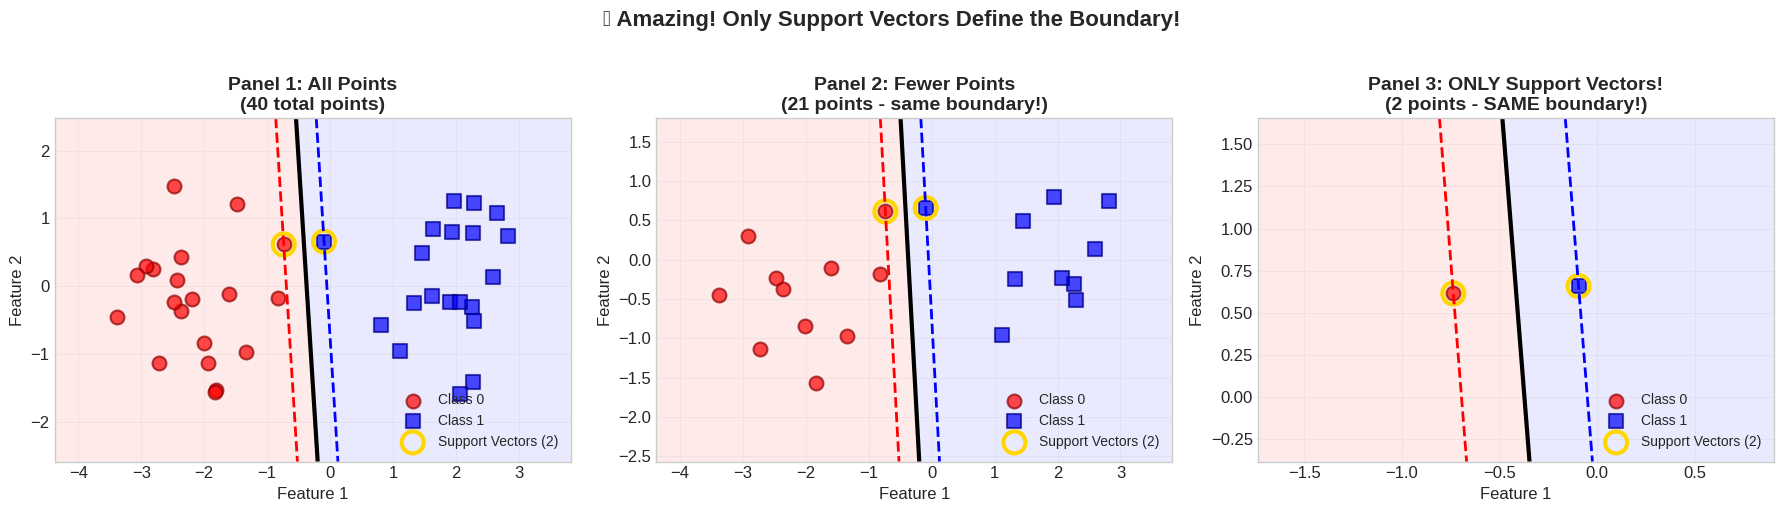


🔑 KEY INSIGHT:
   The decision boundary is EXACTLY THE SAME in all three panels!
   Even with only the support vectors, we get the same result.

   This demonstrates that:
   • Support vectors are the ONLY points that matter for the boundary
   • All other points could be anywhere (as long as they're on the right side)
   • SVMs are very memory-efficient - only store support vectors for predictions!


In [5]:
# Let's demonstrate that ONLY support vectors determine the boundary!

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Panel 1: Original data with all points
plot_svm_decision_boundary(svm_linear, X_simple, y_simple, axes[0],
                           title='Panel 1: All Points\n(40 total points)')

# Panel 2: Remove HALF of the non-support-vector points
# Get indices of support vectors
sv_indices = svm_linear.support_

# Get indices of non-support-vectors
all_indices = np.arange(len(X_simple))
non_sv_indices = np.setdiff1d(all_indices, sv_indices)

# Keep all support vectors + random half of other points
np.random.seed(42)
keep_non_sv = np.random.choice(non_sv_indices, size=len(non_sv_indices)//2, replace=False)
keep_indices = np.concatenate([sv_indices, keep_non_sv])
keep_indices.sort()

X_reduced = X_simple[keep_indices]
y_reduced = y_simple[keep_indices]

# Train a new SVM on the reduced data
svm_reduced = SVC(kernel='linear', C=1000)
svm_reduced.fit(X_reduced, y_reduced)

plot_svm_decision_boundary(svm_reduced, X_reduced, y_reduced, axes[1],
                           title=f'Panel 2: Fewer Points\n({len(X_reduced)} points - same boundary!)')

# Panel 3: Use ONLY the support vectors!
X_sv_only = X_simple[sv_indices]
y_sv_only = y_simple[sv_indices]

svm_sv_only = SVC(kernel='linear', C=1000)
svm_sv_only.fit(X_sv_only, y_sv_only)

plot_svm_decision_boundary(svm_sv_only, X_sv_only, y_sv_only, axes[2],
                           title=f'Panel 3: ONLY Support Vectors!\n({len(X_sv_only)} points - SAME boundary!)')

plt.suptitle('⭐ Amazing! Only Support Vectors Define the Boundary!',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('04_support_vectors_importance.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n🔑 KEY INSIGHT:")
print("   The decision boundary is EXACTLY THE SAME in all three panels!")
print("   Even with only the support vectors, we get the same result.")
print("\n   This demonstrates that:")
print("   • Support vectors are the ONLY points that matter for the boundary")
print("   • All other points could be anywhere (as long as they're on the right side)")
print("   • SVMs are very memory-efficient - only store support vectors for predictions!")

In [6]:
# Let's examine the support vectors in detail

print("📊 SUPPORT VECTOR ANALYSIS")
print("=" * 55)
print(f"\nTotal training points: {len(X_simple)}")
print(f"Number of support vectors: {len(svm_linear.support_vectors_)}")
print(f"Percentage that are support vectors: {100 * len(svm_linear.support_vectors_) / len(X_simple):.1f}%")

print(f"\n📍 Support Vector Details:")
print("-" * 55)
print(f"{'Index':<10} {'Feature 1':<12} {'Feature 2':<12} {'Class'}")
print("-" * 55)

for i, (idx, sv) in enumerate(zip(svm_linear.support_, svm_linear.support_vectors_)):
    class_label = y_simple[idx]
    class_name = 'Red (0)' if class_label == 0 else 'Blue (1)'
    print(f"{idx:<10} {sv[0]:<12.4f} {sv[1]:<12.4f} {class_name}")

print("\n💡 OBSERVATION:")
print("   Support vectors come from BOTH classes!")
print("   They are the 'closest enemies' - the points nearest to the boundary.")
print("   These points 'support' (hold up) the decision boundary.")

📊 SUPPORT VECTOR ANALYSIS

Total training points: 40
Number of support vectors: 2
Percentage that are support vectors: 5.0%

📍 Support Vector Details:
-------------------------------------------------------
Index      Feature 1    Feature 2    Class
-------------------------------------------------------
3          -0.7366      0.6139       Red (0)
37         -0.0958      0.6575       Blue (1)

💡 OBSERVATION:
   Support vectors come from BOTH classes!
   They are the 'closest enemies' - the points nearest to the boundary.
   These points 'support' (hold up) the decision boundary.


---

# Part 4: Hard Margin vs Soft Margin - The C Parameter 🎚️

## The Problem: Real Data Isn't Perfect!

In the real world, data is rarely perfectly separable:
- Some points might **overlap** between classes
- There might be **outliers** or **noise**
- Forcing perfect separation might lead to **overfitting**

## Two Approaches to Handle This

### Hard Margin SVM
- Requires **perfect separation** - no points can be on the wrong side
- **Fails** if data isn't linearly separable
- Very **sensitive to outliers**

### Soft Margin SVM (The Solution!)
- **Allows some mistakes** in exchange for a wider margin
- The **C parameter** controls this trade-off:
  - **Small C**: More mistakes allowed → Wider margin, simpler boundary
  - **Large C**: Fewer mistakes allowed → Narrower margin, fits training data closely

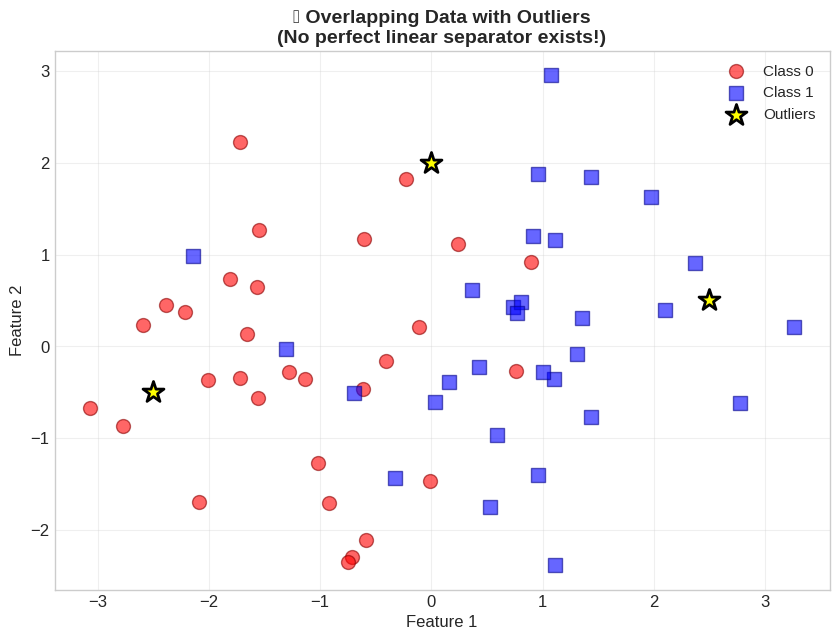


⚠️ CHALLENGE:
   This data is NOT perfectly separable!
   • The classes overlap in the middle
   • There are outliers on the 'wrong' side

   A HARD margin SVM would fail here.
   We need a SOFT margin SVM with parameter C!


In [7]:
# Create data with some overlap (not perfectly separable)
np.random.seed(42)

# Create overlapping clusters
n_per_class = 30
X_class0_overlap = np.random.randn(n_per_class, 2) * 1.2 + np.array([-1, 0])
X_class1_overlap = np.random.randn(n_per_class, 2) * 1.2 + np.array([1, 0])

X_overlap = np.vstack([X_class0_overlap, X_class1_overlap])
y_overlap = np.array([0] * n_per_class + [1] * n_per_class)

# Also add a few outliers (points clearly on the "wrong" side)
outliers_X = np.array([[2.5, 0.5], [-2.5, -0.5], [0, 2.0]])
outliers_y = np.array([0, 1, 0])  # These are on the "wrong" side of where you'd expect

X_noisy = np.vstack([X_overlap, outliers_X])
y_noisy = np.concatenate([y_overlap, outliers_y])

# Visualize the noisy data
plt.figure(figsize=(10, 7))

# Plot regular points
plt.scatter(X_overlap[y_overlap==0, 0], X_overlap[y_overlap==0, 1],
            s=100, c='red', marker='o', edgecolors='darkred', alpha=0.6, label='Class 0')
plt.scatter(X_overlap[y_overlap==1, 0], X_overlap[y_overlap==1, 1],
            s=100, c='blue', marker='s', edgecolors='darkblue', alpha=0.6, label='Class 1')

# Highlight outliers
plt.scatter(outliers_X[:, 0], outliers_X[:, 1], s=250, facecolors='yellow',
            edgecolors='black', linewidths=2, marker='*', label='Outliers', zorder=5)

plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.title('🔀 Overlapping Data with Outliers\n(No perfect linear separator exists!)',
          fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

plt.savefig('05_overlapping_noisy_data.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n⚠️ CHALLENGE:")
print("   This data is NOT perfectly separable!")
print("   • The classes overlap in the middle")
print("   • There are outliers on the 'wrong' side")
print("\n   A HARD margin SVM would fail here.")
print("   We need a SOFT margin SVM with parameter C!")

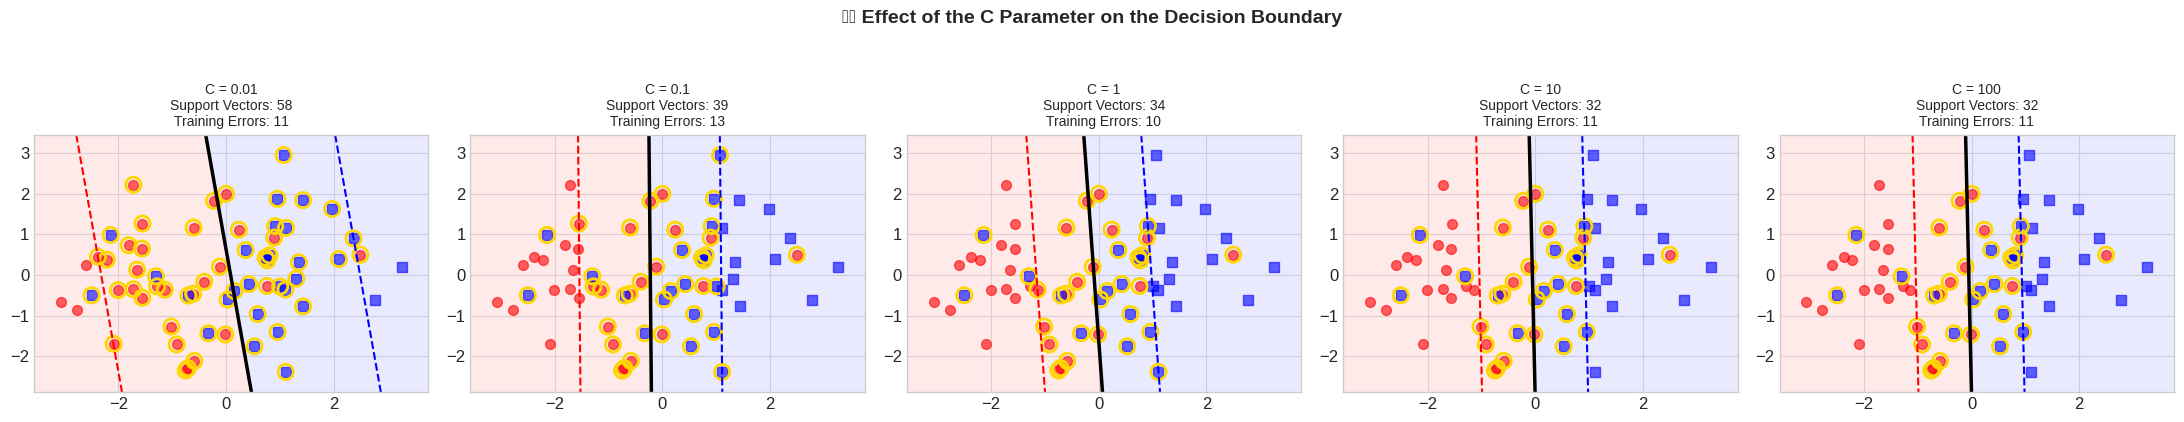


🔑 C PARAMETER EXPLANATION:

   SMALL C (like 0.01):
   • Allows MORE misclassifications on training data
   • Creates a WIDER margin (bigger buffer zone)
   • Results in MANY support vectors
   • More regularization → Simpler model
   • Better generalization, but might underfit

   LARGE C (like 100):
   • Allows FEWER misclassifications (penalizes errors heavily)
   • Creates a NARROWER margin
   • Results in FEWER support vectors
   • Less regularization → More complex model
   • Fits training data better, but might overfit


In [8]:
# Compare different C values to see the trade-off!

C_values = [0.01, 0.1, 1, 10, 100]

fig, axes = plt.subplots(1, 5, figsize=(22, 4))

for ax, C in zip(axes, C_values):
    # Train SVM with this C value
    svm_c = SVC(kernel='linear', C=C)
    svm_c.fit(X_noisy, y_noisy)

    # Create mesh for visualization
    x_min, x_max = X_noisy[:, 0].min() - 0.5, X_noisy[:, 0].max() + 0.5
    y_min, y_max = X_noisy[:, 1].min() - 0.5, X_noisy[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Get decision function values
    Z = svm_c.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plot classification regions
    ax.contourf(xx, yy, Z, levels=[-100, 0, 100], colors=['#FFCCCC', '#CCCCFF'], alpha=0.4)

    # Plot margin boundaries and decision boundary
    ax.contour(xx, yy, Z, levels=[-1, 0, 1], colors=['red', 'black', 'blue'],
               linestyles=['--', '-', '--'], linewidths=[1.5, 2.5, 1.5])

    # Plot data points
    ax.scatter(X_noisy[y_noisy==0, 0], X_noisy[y_noisy==0, 1],
               s=50, c='red', marker='o', alpha=0.6)
    ax.scatter(X_noisy[y_noisy==1, 0], X_noisy[y_noisy==1, 1],
               s=50, c='blue', marker='s', alpha=0.6)

    # Highlight support vectors
    ax.scatter(svm_c.support_vectors_[:, 0], svm_c.support_vectors_[:, 1],
               s=120, facecolors='none', edgecolors='gold', linewidths=2)

    # Count misclassifications
    predictions = svm_c.predict(X_noisy)
    n_errors = np.sum(predictions != y_noisy)
    n_sv = len(svm_c.support_vectors_)

    ax.set_title(f'C = {C}\nSupport Vectors: {n_sv}\nTraining Errors: {n_errors}', fontsize=10)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

plt.suptitle('🎚️ Effect of the C Parameter on the Decision Boundary',
             fontsize=14, fontweight='bold', y=1.05)
plt.tight_layout()
plt.savefig('06_c_parameter_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n🔑 C PARAMETER EXPLANATION:")
print("\n   SMALL C (like 0.01):")
print("   • Allows MORE misclassifications on training data")
print("   • Creates a WIDER margin (bigger buffer zone)")
print("   • Results in MANY support vectors")
print("   • More regularization → Simpler model")
print("   • Better generalization, but might underfit")

print("\n   LARGE C (like 100):")
print("   • Allows FEWER misclassifications (penalizes errors heavily)")
print("   • Creates a NARROWER margin")
print("   • Results in FEWER support vectors")
print("   • Less regularization → More complex model")
print("   • Fits training data better, but might overfit")

---

# Part 5: The Kernel Trick - Magic for Non-Linear Data! 🪄

## The Problem with Linear Boundaries

So far, we've drawn **straight lines** to separate classes. But what if the data looks like this:
- A **circle** inside another circle?
- Two **interleaved moons**?
- A **spiral** pattern?

A straight line simply **CANNOT** separate such data!

## The Brilliant Solution: The Kernel Trick!

The key insight is:
1. **Transform** the data into a higher-dimensional space
2. In this new space, the data might become **linearly separable**!
3. Find the linear boundary in the high-dimensional space
4. When projected back to original space, it appears as a **curve**!

The "trick" is that we don't actually compute the transformation - we use a **kernel function** that does the math efficiently!

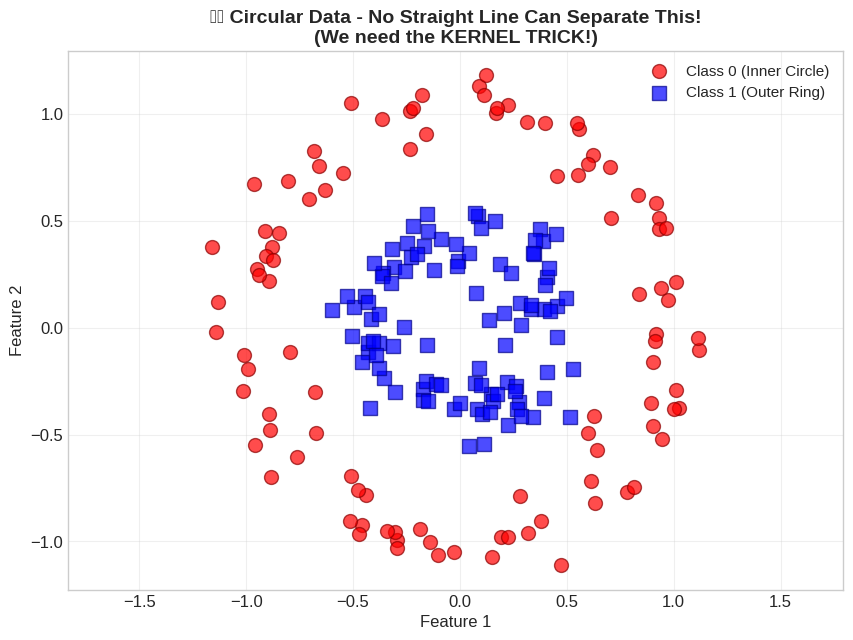


❌ THE PROBLEM:
   No straight line can separate the inner circle from the outer ring!
   We need a CIRCULAR boundary, but linear SVM can only draw lines.

💡 THE SOLUTION: The Kernel Trick!
   Transform the data to a higher dimension where it BECOMES separable!


In [9]:
# Create the classic "circles" problem - impossible to separate with a line!
X_circles, y_circles = make_circles(n_samples=200, noise=0.1, factor=0.4, random_state=42)

# Visualize this challenging data
plt.figure(figsize=(10, 7))

plt.scatter(X_circles[y_circles==0, 0], X_circles[y_circles==0, 1],
            s=100, c='red', marker='o', edgecolors='darkred', alpha=0.7, label='Class 0 (Inner Circle)')
plt.scatter(X_circles[y_circles==1, 0], X_circles[y_circles==1, 1],
            s=100, c='blue', marker='s', edgecolors='darkblue', alpha=0.7, label='Class 1 (Outer Ring)')

plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.title('🔴🔵 Circular Data - No Straight Line Can Separate This!\n(We need the KERNEL TRICK!)',
          fontsize=14, fontweight='bold')
plt.axis('equal')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

plt.savefig('07_circular_data_problem.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n❌ THE PROBLEM:")
print("   No straight line can separate the inner circle from the outer ring!")
print("   We need a CIRCULAR boundary, but linear SVM can only draw lines.")
print("\n💡 THE SOLUTION: The Kernel Trick!")
print("   Transform the data to a higher dimension where it BECOMES separable!")

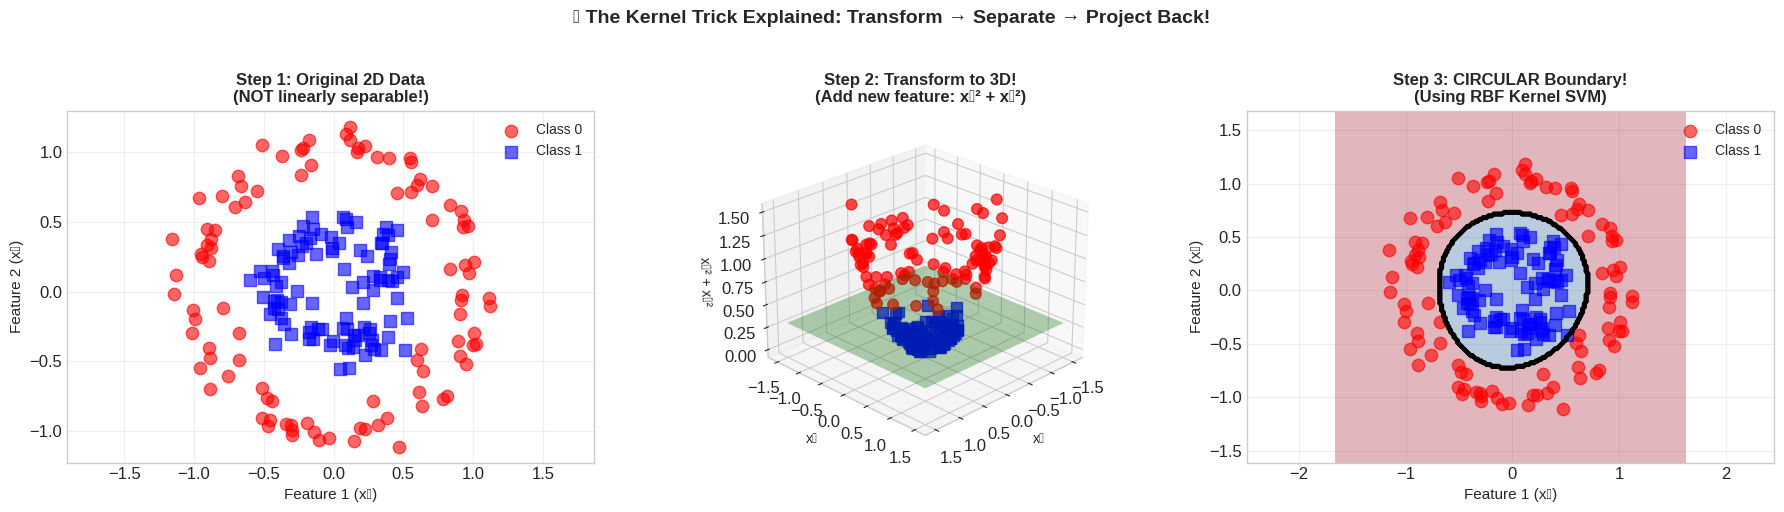


✨ THE KERNEL TRICK IN 3 STEPS:

   STEP 1: Start with 2D data that's NOT linearly separable
           (The circles can't be separated by a straight line)

   STEP 2: Transform to higher dimensions (add x₁² + x₂² as 3rd feature)
           Now the inner circle has LOW z-values, outer ring has HIGH z-values
           A FLAT PLANE can now separate them!

   STEP 3: The flat plane in 3D projects back to a CIRCLE in 2D!
           We get the curved boundary we needed!


In [10]:
# Let's visualize the kernel trick concept step by step!

fig = plt.figure(figsize=(18, 5))

# PANEL 1: Original 2D data (the problem)
ax1 = fig.add_subplot(131)
ax1.scatter(X_circles[y_circles==0, 0], X_circles[y_circles==0, 1],
            s=80, c='red', marker='o', alpha=0.6, label='Class 0')
ax1.scatter(X_circles[y_circles==1, 0], X_circles[y_circles==1, 1],
            s=80, c='blue', marker='s', alpha=0.6, label='Class 1')
ax1.set_xlabel('Feature 1 (x₁)', fontsize=11)
ax1.set_ylabel('Feature 2 (x₂)', fontsize=11)
ax1.set_title('Step 1: Original 2D Data\n(NOT linearly separable!)', fontsize=12, fontweight='bold')
ax1.axis('equal')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# PANEL 2: Transform to 3D by adding x₁² + x₂² as the third dimension
ax2 = fig.add_subplot(132, projection='3d')

# Create the new 3rd feature: distance from origin squared
z_feature = X_circles[:, 0]**2 + X_circles[:, 1]**2

# Plot the 3D data
ax2.scatter(X_circles[y_circles==0, 0], X_circles[y_circles==0, 1],
            z_feature[y_circles==0], s=60, c='red', marker='o', alpha=0.7, label='Class 0')
ax2.scatter(X_circles[y_circles==1, 0], X_circles[y_circles==1, 1],
            z_feature[y_circles==1], s=60, c='blue', marker='s', alpha=0.7, label='Class 1')

# Draw a separating plane (at z = 0.5, which is between the classes)
xx_plane, yy_plane = np.meshgrid(np.linspace(-1.5, 1.5, 20), np.linspace(-1.5, 1.5, 20))
zz_plane = np.ones_like(xx_plane) * 0.3  # Horizontal plane
ax2.plot_surface(xx_plane, yy_plane, zz_plane, alpha=0.3, color='green')

ax2.set_xlabel('x₁', fontsize=10)
ax2.set_ylabel('x₂', fontsize=10)
ax2.set_zlabel('x₁² + x₂²', fontsize=10)
ax2.set_title('Step 2: Transform to 3D!\n(Add new feature: x₁² + x₂²)', fontsize=12, fontweight='bold')
ax2.view_init(elev=25, azim=45)

# PANEL 3: Result - circular boundary in original 2D space
ax3 = fig.add_subplot(133)

# Train an RBF (Radial Basis Function) kernel SVM
svm_rbf = SVC(kernel='rbf', C=10, gamma='auto')
svm_rbf.fit(X_circles, y_circles)

# Create mesh for visualization
x_min, x_max = X_circles[:, 0].min() - 0.5, X_circles[:, 0].max() + 0.5
y_min, y_max = X_circles[:, 1].min() - 0.5, X_circles[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot decision regions and boundary
ax3.contourf(xx, yy, Z, cmap='RdBu', alpha=0.3)
ax3.contour(xx, yy, Z, colors='black', linewidths=2.5)
ax3.scatter(X_circles[y_circles==0, 0], X_circles[y_circles==0, 1],
            s=80, c='red', marker='o', alpha=0.6, label='Class 0')
ax3.scatter(X_circles[y_circles==1, 0], X_circles[y_circles==1, 1],
            s=80, c='blue', marker='s', alpha=0.6, label='Class 1')

ax3.set_xlabel('Feature 1 (x₁)', fontsize=11)
ax3.set_ylabel('Feature 2 (x₂)', fontsize=11)
ax3.set_title('Step 3: CIRCULAR Boundary!\n(Using RBF Kernel SVM)', fontsize=12, fontweight='bold')
ax3.axis('equal')
ax3.legend(fontsize=10)
ax3.grid(True, alpha=0.3)

plt.suptitle('🪄 The Kernel Trick Explained: Transform → Separate → Project Back!',
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('08_kernel_trick_explained.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✨ THE KERNEL TRICK IN 3 STEPS:")
print("\n   STEP 1: Start with 2D data that's NOT linearly separable")
print("           (The circles can't be separated by a straight line)")
print("\n   STEP 2: Transform to higher dimensions (add x₁² + x₂² as 3rd feature)")
print("           Now the inner circle has LOW z-values, outer ring has HIGH z-values")
print("           A FLAT PLANE can now separate them!")
print("\n   STEP 3: The flat plane in 3D projects back to a CIRCLE in 2D!")
print("           We get the curved boundary we needed!")

---

# Part 6: Different Kernel Types 🧬

SVMs support different kernels for different types of data patterns:

## 1. Linear Kernel
$$K(x, y) = x \cdot y$$
- Creates **straight line** boundaries
- **Fastest** to train and predict
- Good for **linearly separable** data or **high-dimensional** data (like text)

## 2. Polynomial Kernel
$$K(x, y) = (\gamma \cdot x \cdot y + r)^d$$
- Creates **polynomial curve** boundaries
- **Degree d** controls complexity (d=2 gives parabolas, d=3 gives cubic curves)
- Good for data with **polynomial relationships**

## 3. RBF (Radial Basis Function) Kernel - Most Popular!
$$K(x, y) = e^{-\gamma ||x - y||^2}$$
- Creates **flexible, curved** boundaries
- Can fit **almost any pattern** (very powerful!)
- **Default choice** when you don't know what to use
- Parameter **γ (gamma)** controls flexibility

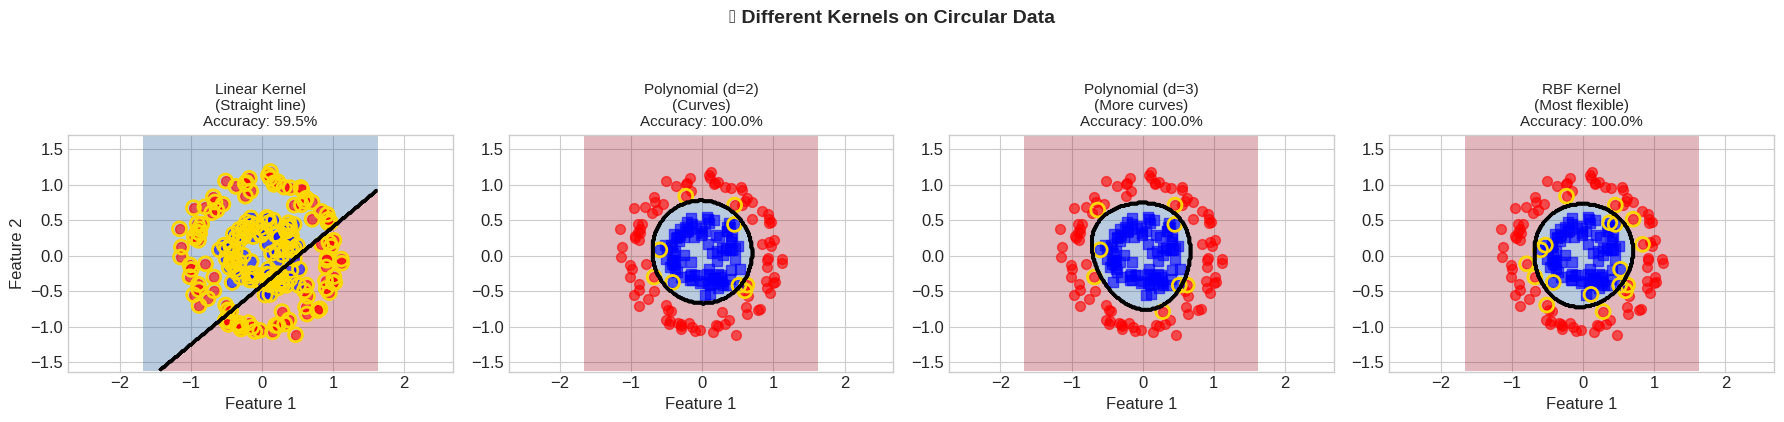


📊 KERNEL COMPARISON ON CIRCULAR DATA:
   • Linear kernel: FAILS - can only draw straight lines (50% accuracy = random!)
   • Polynomial d=2: Works! The circular pattern is quadratic
   • Polynomial d=3: Also works, but overkill for this data
   • RBF kernel: Works great! Adapts to the circular pattern automatically


In [11]:
# Compare all kernel types on the circular data!

kernels = [
    ('linear', {}, 'Linear Kernel\n(Straight line)'),
    ('poly', {'degree': 2, 'coef0': 1}, 'Polynomial (d=2)\n(Curves)'),
    ('poly', {'degree': 3, 'coef0': 1}, 'Polynomial (d=3)\n(More curves)'),
    ('rbf', {'gamma': 'auto'}, 'RBF Kernel\n(Most flexible)')
]

fig, axes = plt.subplots(1, 4, figsize=(18, 4))

for ax, (kernel, params, title) in zip(axes, kernels):
    # Train SVM with this kernel
    svm_k = SVC(kernel=kernel, C=10, **params)
    svm_k.fit(X_circles, y_circles)

    # Create mesh
    x_min, x_max = X_circles[:, 0].min() - 0.5, X_circles[:, 0].max() + 0.5
    y_min, y_max = X_circles[:, 1].min() - 0.5, X_circles[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = svm_k.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plot
    ax.contourf(xx, yy, Z, cmap='RdBu', alpha=0.3)
    ax.contour(xx, yy, Z, colors='black', linewidths=2)
    ax.scatter(X_circles[y_circles==0, 0], X_circles[y_circles==0, 1],
               s=50, c='red', marker='o', alpha=0.6)
    ax.scatter(X_circles[y_circles==1, 0], X_circles[y_circles==1, 1],
               s=50, c='blue', marker='s', alpha=0.6)

    # Show support vectors
    ax.scatter(svm_k.support_vectors_[:, 0], svm_k.support_vectors_[:, 1],
               s=100, facecolors='none', edgecolors='gold', linewidths=2)

    acc = svm_k.score(X_circles, y_circles)
    ax.set_title(f'{title}\nAccuracy: {acc:.1%}', fontsize=11)
    ax.set_xlabel('Feature 1')
    ax.axis('equal')

axes[0].set_ylabel('Feature 2')

plt.suptitle('🧬 Different Kernels on Circular Data', fontsize=14, fontweight='bold', y=1.05)
plt.tight_layout()
plt.savefig('09_kernel_comparison_circles.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n📊 KERNEL COMPARISON ON CIRCULAR DATA:")
print("   • Linear kernel: FAILS - can only draw straight lines (50% accuracy = random!)")
print("   • Polynomial d=2: Works! The circular pattern is quadratic")
print("   • Polynomial d=3: Also works, but overkill for this data")
print("   • RBF kernel: Works great! Adapts to the circular pattern automatically")

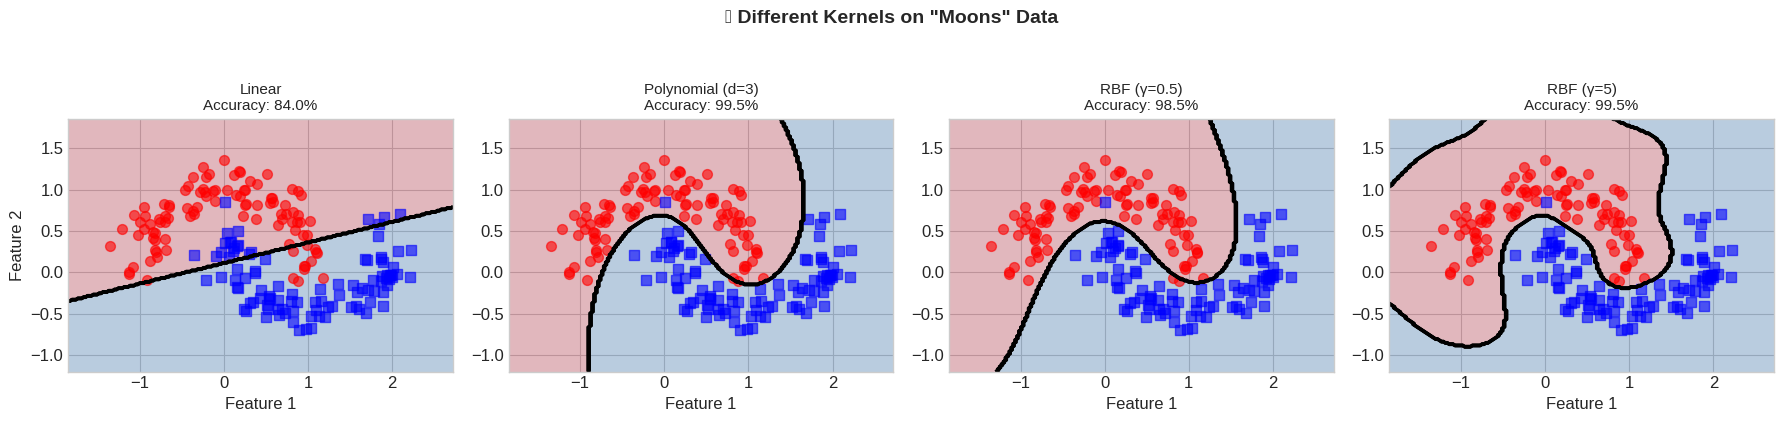


🌙 OBSERVATIONS ON MOONS DATA:
   • Linear: Struggles - can only draw a straight line
   • Polynomial: Decent, but the curve might not match the moons exactly
   • RBF with moderate γ (0.5): Great! Smooth curve that separates the moons
   • RBF with high γ (5): Too complex! Creates wiggly boundary (overfitting risk)


In [12]:
# Let's try on the "moons" dataset - another classic non-linear problem

X_moons, y_moons = make_moons(n_samples=200, noise=0.15, random_state=42)

fig, axes = plt.subplots(1, 4, figsize=(18, 4))

kernels = [
    ('linear', {}, 'Linear'),
    ('poly', {'degree': 3, 'coef0': 1}, 'Polynomial (d=3)'),
    ('rbf', {'gamma': 0.5}, 'RBF (γ=0.5)'),
    ('rbf', {'gamma': 5}, 'RBF (γ=5)')
]

for ax, (kernel, params, title) in zip(axes, kernels):
    # Train
    svm = SVC(kernel=kernel, C=10, **params)
    svm.fit(X_moons, y_moons)

    # Mesh
    x_min, x_max = X_moons[:, 0].min() - 0.5, X_moons[:, 0].max() + 0.5
    y_min, y_max = X_moons[:, 1].min() - 0.5, X_moons[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plot
    ax.contourf(xx, yy, Z, cmap='RdBu', alpha=0.3)
    ax.contour(xx, yy, Z, colors='black', linewidths=2)
    ax.scatter(X_moons[y_moons==0, 0], X_moons[y_moons==0, 1],
               s=50, c='red', marker='o', alpha=0.6)
    ax.scatter(X_moons[y_moons==1, 0], X_moons[y_moons==1, 1],
               s=50, c='blue', marker='s', alpha=0.6)

    acc = svm.score(X_moons, y_moons)
    ax.set_title(f'{title}\nAccuracy: {acc:.1%}', fontsize=11)
    ax.set_xlabel('Feature 1')

axes[0].set_ylabel('Feature 2')

plt.suptitle('🌙 Different Kernels on "Moons" Data', fontsize=14, fontweight='bold', y=1.05)
plt.tight_layout()
plt.savefig('10_kernel_comparison_moons.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n🌙 OBSERVATIONS ON MOONS DATA:")
print("   • Linear: Struggles - can only draw a straight line")
print("   • Polynomial: Decent, but the curve might not match the moons exactly")
print("   • RBF with moderate γ (0.5): Great! Smooth curve that separates the moons")
print("   • RBF with high γ (5): Too complex! Creates wiggly boundary (overfitting risk)")

---

# Part 7: The Gamma (γ) Parameter - Fine-Tuning RBF Kernel 🎚️

## What Does Gamma Control?

For the RBF kernel, **gamma (γ)** controls the **influence range** of each training point:

- **Small γ**: Each point has **far-reaching influence** → Smooth, simple boundary
- **Large γ**: Each point only affects **nearby area** → Complex, wiggly boundary

## The Intuition

Think of each training point as a **light bulb**:
- **Small γ** = Bright, powerful bulbs that light up a large area
- **Large γ** = Dim, weak bulbs that only light up a tiny spot

With large γ, the model becomes very "local" - it memorizes each point rather than finding general patterns. This leads to **overfitting**!

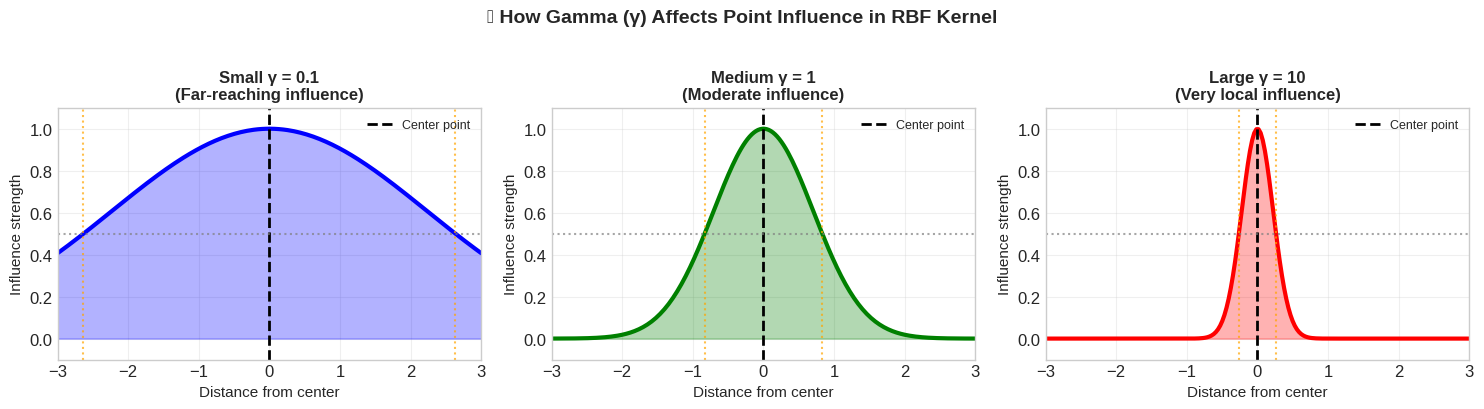


💡 GAMMA INTUITION:

   Small γ (0.1):
   • Each point influences a WIDE area
   • Results in SMOOTH, simple boundaries
   • Model is more general, but might underfit

   Large γ (10):
   • Each point only affects its IMMEDIATE neighborhood
   • Results in COMPLEX, wiggly boundaries
   • Model can memorize training data (OVERFITTING!)


In [13]:
# Visualize how gamma affects the RBF kernel's "influence region"

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Show the RBF kernel influence for different gamma values
x = np.linspace(-3, 3, 200)
center = 0  # The "center point" we're measuring distance from

gammas = [0.1, 1, 10]
titles = [
    'Small γ = 0.1\n(Far-reaching influence)',
    'Medium γ = 1\n(Moderate influence)',
    'Large γ = 10\n(Very local influence)'
]
colors = ['blue', 'green', 'red']

for ax, gamma, title, color in zip(axes, gammas, titles, colors):
    # RBF kernel: K(x, center) = exp(-γ * ||x - center||²)
    rbf_values = np.exp(-gamma * (x - center)**2)

    ax.plot(x, rbf_values, color=color, linewidth=3)
    ax.fill_between(x, 0, rbf_values, alpha=0.3, color=color)

    # Mark the center point
    ax.axvline(x=0, color='black', linestyle='--', linewidth=2, label='Center point')

    # Mark where influence drops to 0.5
    ax.axhline(y=0.5, color='gray', linestyle=':', alpha=0.7)
    half_width = np.sqrt(-np.log(0.5) / gamma)
    ax.axvline(x=half_width, color='orange', linestyle=':', alpha=0.7)
    ax.axvline(x=-half_width, color='orange', linestyle=':', alpha=0.7)

    ax.set_xlabel('Distance from center', fontsize=11)
    ax.set_ylabel('Influence strength', fontsize=11)
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_ylim(-0.1, 1.1)
    ax.set_xlim(-3, 3)
    ax.grid(True, alpha=0.3)
    ax.legend(loc='upper right', fontsize=9)

plt.suptitle('🎯 How Gamma (γ) Affects Point Influence in RBF Kernel',
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('11_gamma_influence_explanation.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n💡 GAMMA INTUITION:")
print("\n   Small γ (0.1):")
print("   • Each point influences a WIDE area")
print("   • Results in SMOOTH, simple boundaries")
print("   • Model is more general, but might underfit")
print("\n   Large γ (10):")
print("   • Each point only affects its IMMEDIATE neighborhood")
print("   • Results in COMPLEX, wiggly boundaries")
print("   • Model can memorize training data (OVERFITTING!)")

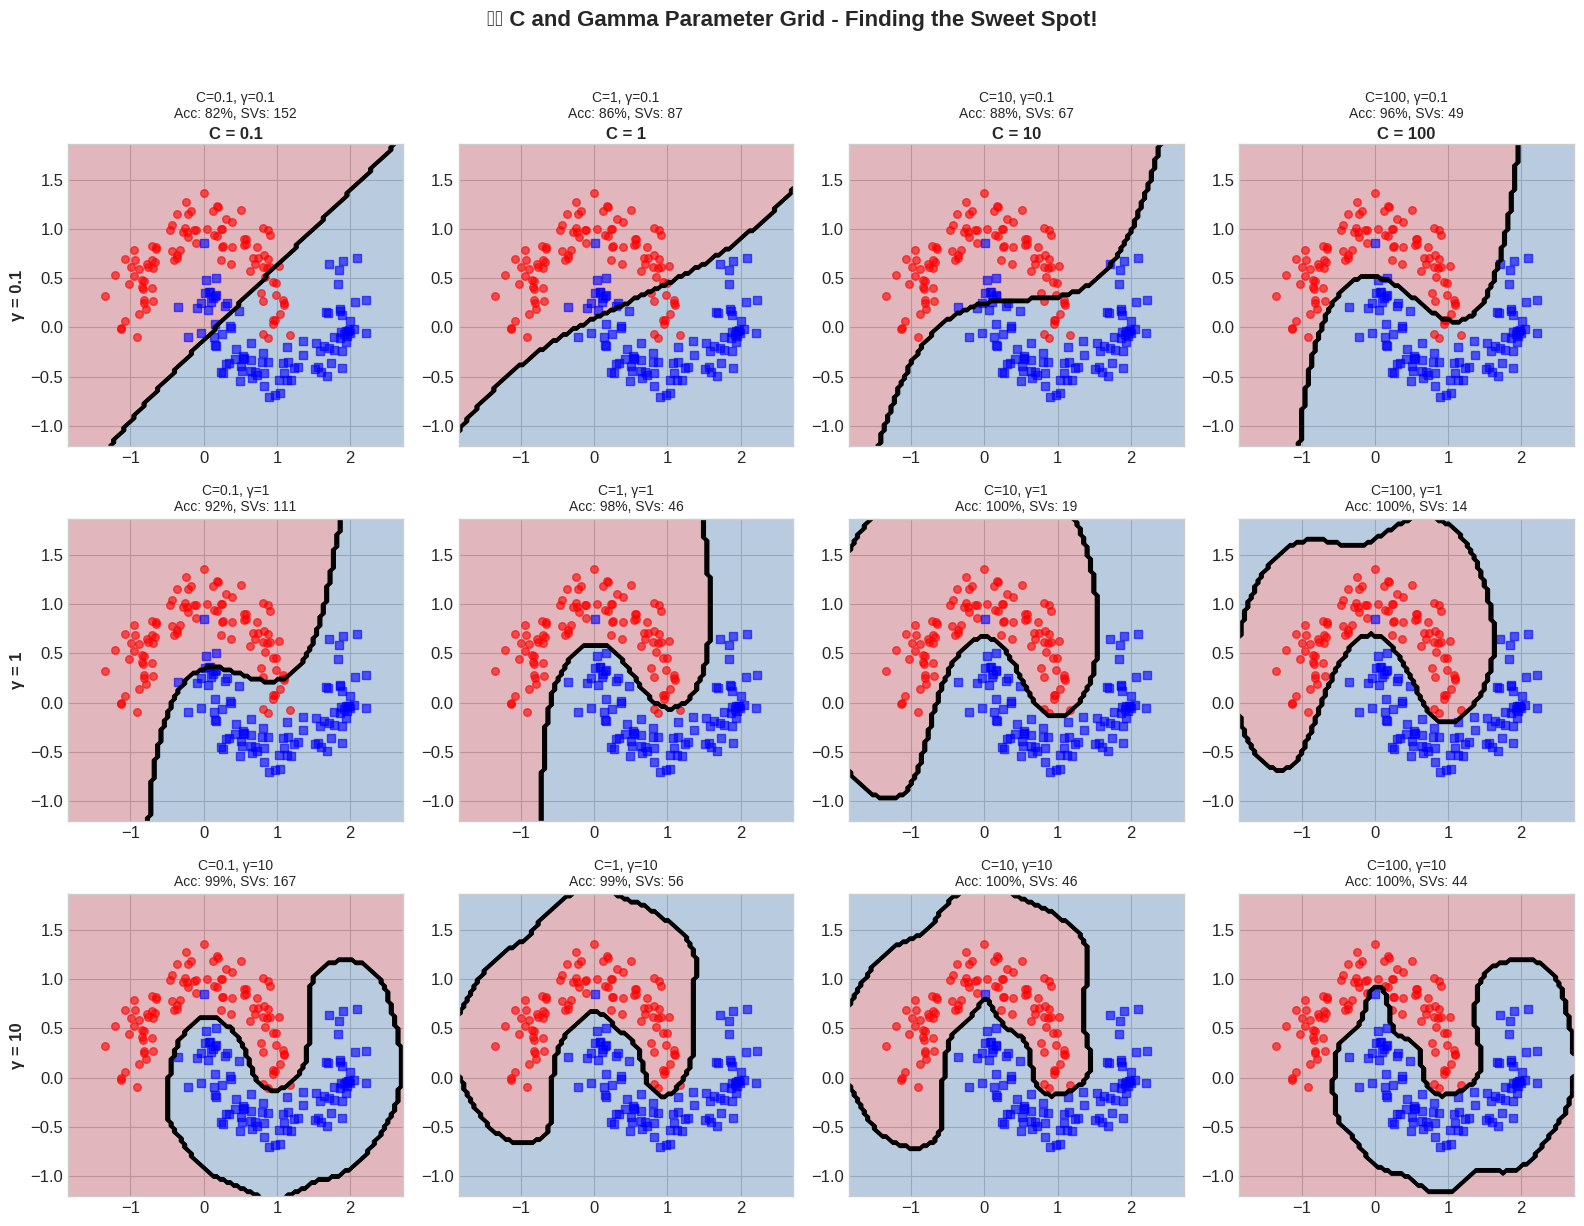


📊 KEY OBSERVATIONS FROM THE GRID:

   ROWS (Gamma effect - top to bottom):
   • Top row (small γ): Smooth, simple boundaries
   • Bottom row (large γ): Complex, wiggly boundaries (overfitting!)

   COLUMNS (C effect - left to right):
   • Left columns (small C): More regularization, wider margins
   • Right columns (large C): Less regularization, tighter fit

   💡 SWEET SPOT: Usually moderate values like C=1-10 and γ='auto' or γ=0.1-1
   💡 Use cross-validation to find the best combination for your data!


In [14]:
# Comprehensive grid: C vs Gamma - The two most important hyperparameters!

C_values = [0.1, 1, 10, 100]
gamma_values = [0.1, 1, 10]

fig, axes = plt.subplots(len(gamma_values), len(C_values), figsize=(16, 12))

for i, gamma in enumerate(gamma_values):
    for j, C in enumerate(C_values):
        ax = axes[i, j]

        # Train SVM with these parameters
        svm = SVC(kernel='rbf', C=C, gamma=gamma)
        svm.fit(X_moons, y_moons)

        # Create mesh
        x_min, x_max = X_moons[:, 0].min() - 0.5, X_moons[:, 0].max() + 0.5
        y_min, y_max = X_moons[:, 1].min() - 0.5, X_moons[:, 1].max() + 0.5
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                             np.linspace(y_min, y_max, 100))
        Z = svm.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

        # Plot
        ax.contourf(xx, yy, Z, cmap='RdBu', alpha=0.3)
        ax.contour(xx, yy, Z, colors='black', linewidths=1.5)
        ax.scatter(X_moons[y_moons==0, 0], X_moons[y_moons==0, 1],
                   s=30, c='red', marker='o', alpha=0.6)
        ax.scatter(X_moons[y_moons==1, 0], X_moons[y_moons==1, 1],
                   s=30, c='blue', marker='s', alpha=0.6)

        acc = svm.score(X_moons, y_moons)
        n_sv = len(svm.support_vectors_)
        ax.set_title(f'C={C}, γ={gamma}\nAcc: {acc:.0%}, SVs: {n_sv}', fontsize=10)

        # Add row/column labels
        if j == 0:
            ax.set_ylabel(f'γ = {gamma}', fontsize=12, fontweight='bold')
        if i == 0:
            ax.set_xlabel(f'C = {C}', fontsize=12, fontweight='bold')
            ax.xaxis.set_label_position('top')

plt.suptitle('🎛️ C and Gamma Parameter Grid - Finding the Sweet Spot!',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('12_c_gamma_grid.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n📊 KEY OBSERVATIONS FROM THE GRID:")
print("\n   ROWS (Gamma effect - top to bottom):")
print("   • Top row (small γ): Smooth, simple boundaries")
print("   • Bottom row (large γ): Complex, wiggly boundaries (overfitting!)")

print("\n   COLUMNS (C effect - left to right):")
print("   • Left columns (small C): More regularization, wider margins")
print("   • Right columns (large C): Less regularization, tighter fit")

print("\n   💡 SWEET SPOT: Usually moderate values like C=1-10 and γ='auto' or γ=0.1-1")
print("   💡 Use cross-validation to find the best combination for your data!")

---

# Part 8: Multi-Class Classification 🎨

SVM is naturally a **binary** (two-class) classifier. But what about problems with **more than two classes**?

## Two Main Strategies

### 1. One-vs-Rest (OvR) / One-vs-All (OvA)
- Train **K classifiers** for K classes
- Each classifier: "Is it class k vs. everything else?"
- Predict the class with the **highest confidence score**

### 2. One-vs-One (OvO) - sklearn's default for SVM
- Train **K(K-1)/2 classifiers** for all pairs of classes
- Each classifier: "Is it class A or class B?"
- Predict by **voting** - the class that wins the most duels

Scikit-learn handles this automatically - just pass data with multiple class labels!

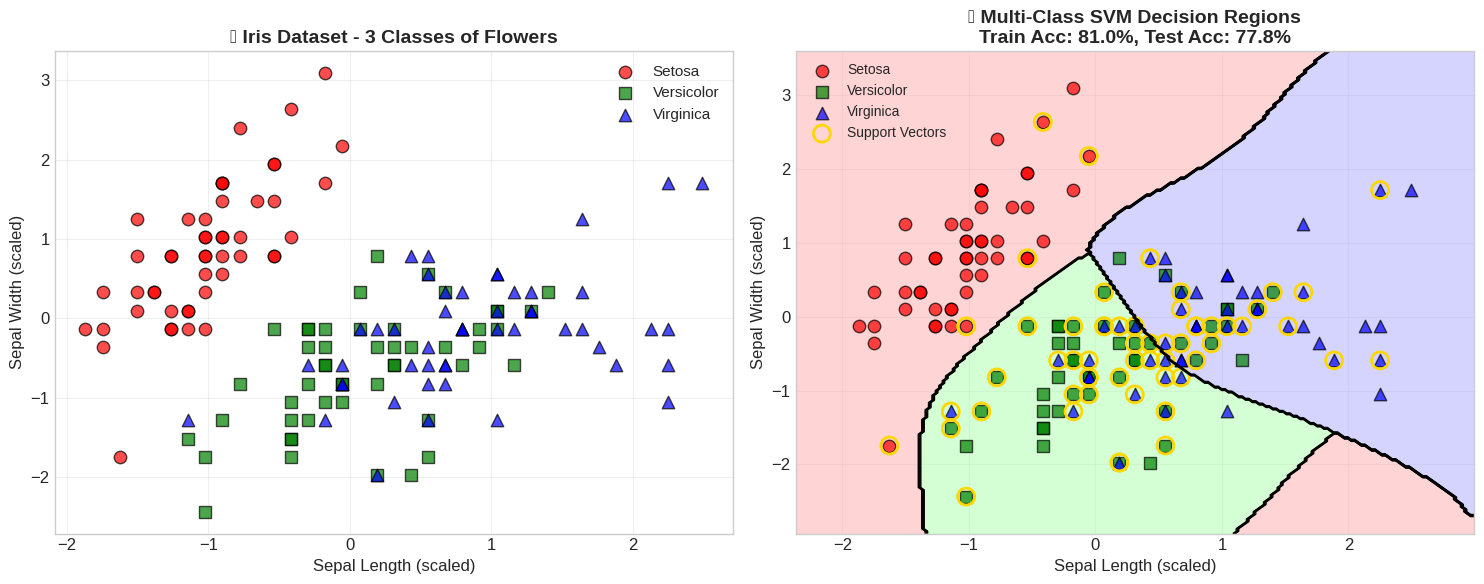


📊 MULTI-CLASS SVM RESULTS:
   Number of classes: 3
   Total support vectors: 57
   Support vectors per class: [ 5 27 25]

   Training accuracy: 81.0%
   Testing accuracy: 77.8%


In [15]:
# Create a 3-class dataset for demonstration
from sklearn.datasets import load_iris

# Load the famous Iris dataset
iris = load_iris()
X_iris = iris.data[:, :2]  # Use only first 2 features for visualization
y_iris = iris.target

# Scale features for better SVM performance
scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris)

# Split into training and testing sets
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris_scaled, y_iris, test_size=0.3, random_state=42
)

# Train multi-class SVM
svm_multi = SVC(kernel='rbf', C=10, gamma='auto')
svm_multi.fit(X_train_iris, y_train_iris)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Panel 1: Just the data
colors = ['red', 'green', 'blue']
markers = ['o', 's', '^']
class_names = iris.target_names

for i, (color, marker, name) in enumerate(zip(colors, markers, class_names)):
    mask = y_iris == i
    axes[0].scatter(X_iris_scaled[mask, 0], X_iris_scaled[mask, 1],
                    c=color, marker=marker, s=80, alpha=0.7,
                    edgecolors='black', linewidth=1,
                    label=name.capitalize())

axes[0].set_xlabel('Sepal Length (scaled)', fontsize=12)
axes[0].set_ylabel('Sepal Width (scaled)', fontsize=12)
axes[0].set_title('🌸 Iris Dataset - 3 Classes of Flowers', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Panel 2: Decision regions with SVM
x_min, x_max = X_iris_scaled[:, 0].min() - 0.5, X_iris_scaled[:, 0].max() + 0.5
y_min, y_max = X_iris_scaled[:, 1].min() - 0.5, X_iris_scaled[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = svm_multi.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Color regions
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
axes[1].contourf(xx, yy, Z, cmap=cmap_light, alpha=0.5)
axes[1].contour(xx, yy, Z, colors='black', linewidths=1)

# Plot data points
for i, (color, marker, name) in enumerate(zip(colors, markers, class_names)):
    mask = y_iris == i
    axes[1].scatter(X_iris_scaled[mask, 0], X_iris_scaled[mask, 1],
                    c=color, marker=marker, s=80, alpha=0.7,
                    edgecolors='black', linewidth=1,
                    label=name.capitalize())

# Highlight support vectors
axes[1].scatter(svm_multi.support_vectors_[:, 0], svm_multi.support_vectors_[:, 1],
                s=150, facecolors='none', edgecolors='gold', linewidths=2,
                label='Support Vectors')

train_acc = svm_multi.score(X_train_iris, y_train_iris)
test_acc = svm_multi.score(X_test_iris, y_test_iris)

axes[1].set_xlabel('Sepal Length (scaled)', fontsize=12)
axes[1].set_ylabel('Sepal Width (scaled)', fontsize=12)
axes[1].set_title(f'🎯 Multi-Class SVM Decision Regions\nTrain Acc: {train_acc:.1%}, Test Acc: {test_acc:.1%}',
                  fontsize=14, fontweight='bold')
axes[1].legend(loc='upper left', fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('13_multiclass_svm.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\n📊 MULTI-CLASS SVM RESULTS:")
print(f"   Number of classes: {len(np.unique(y_iris))}")
print(f"   Total support vectors: {len(svm_multi.support_vectors_)}")
print(f"   Support vectors per class: {svm_multi.n_support_}")
print(f"\n   Training accuracy: {train_acc:.1%}")
print(f"   Testing accuracy: {test_acc:.1%}")

---

# Part 9: Practical Tips - Feature Scaling is CRUCIAL! ⚠️

## Why Feature Scaling Matters for SVM

SVM is based on **distances** between points. If features have very different scales:
- Features with larger values will **dominate** the distance calculations
- Features with smaller values will be **ignored**
- The margin calculation becomes **imbalanced**

**ALWAYS scale your features before using SVM!**

Common approaches:
- **StandardScaler**: Mean=0, Std=1 (most common)
- **MinMaxScaler**: Range [0, 1]

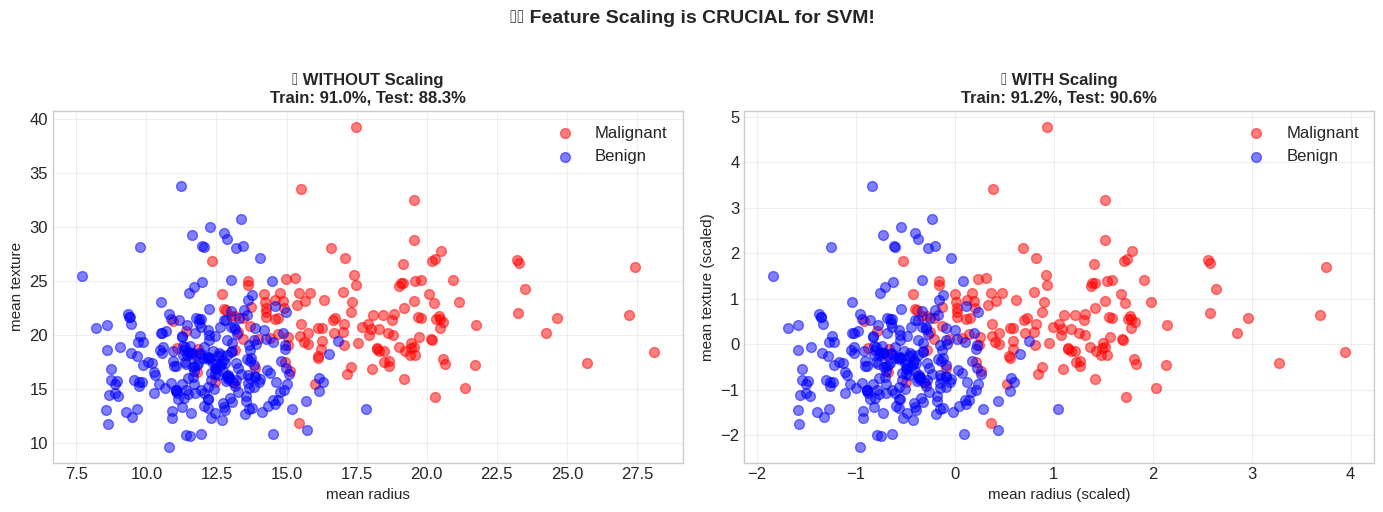


📊 SCALING IMPACT ON PERFORMANCE:

   WITHOUT scaling:
   • Training accuracy: 91.0%
   • Testing accuracy:  88.3%

   WITH scaling:
   • Training accuracy: 91.2%
   • Testing accuracy:  90.6%

   Improvement: +2.3 percentage points on test set!

   💡 ALWAYS use StandardScaler or MinMaxScaler before training SVM!


In [16]:
# Demonstrate the importance of feature scaling
from sklearn.datasets import load_breast_cancer

# Load breast cancer dataset (features have VERY different scales!)
cancer = load_breast_cancer()
X_cancer = cancer.data[:, :2]  # First 2 features for visualization
y_cancer = cancer.target

# Split data
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_cancer, y_cancer, test_size=0.3, random_state=42
)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_c)
X_test_scaled = scaler.transform(X_test_c)

# Train SVM WITHOUT scaling
svm_no_scale = SVC(kernel='rbf', C=1, gamma='auto')
svm_no_scale.fit(X_train_c, y_train_c)
acc_no_scale_train = svm_no_scale.score(X_train_c, y_train_c)
acc_no_scale_test = svm_no_scale.score(X_test_c, y_test_c)

# Train SVM WITH scaling
svm_scaled = SVC(kernel='rbf', C=1, gamma='auto')
svm_scaled.fit(X_train_scaled, y_train_c)
acc_scaled_train = svm_scaled.score(X_train_scaled, y_train_c)
acc_scaled_test = svm_scaled.score(X_test_scaled, y_test_c)

# Visualize the difference
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Panel 1: Without scaling
ax = axes[0]
ax.scatter(X_train_c[y_train_c==0, 0], X_train_c[y_train_c==0, 1],
           s=50, c='red', alpha=0.5, label='Malignant')
ax.scatter(X_train_c[y_train_c==1, 0], X_train_c[y_train_c==1, 1],
           s=50, c='blue', alpha=0.5, label='Benign')
ax.set_xlabel(f'{cancer.feature_names[0]}', fontsize=11)
ax.set_ylabel(f'{cancer.feature_names[1]}', fontsize=11)
ax.set_title(f'❌ WITHOUT Scaling\nTrain: {acc_no_scale_train:.1%}, Test: {acc_no_scale_test:.1%}',
             fontsize=12, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

# Panel 2: With scaling
ax = axes[1]
ax.scatter(X_train_scaled[y_train_c==0, 0], X_train_scaled[y_train_c==0, 1],
           s=50, c='red', alpha=0.5, label='Malignant')
ax.scatter(X_train_scaled[y_train_c==1, 0], X_train_scaled[y_train_c==1, 1],
           s=50, c='blue', alpha=0.5, label='Benign')
ax.set_xlabel(f'{cancer.feature_names[0]} (scaled)', fontsize=11)
ax.set_ylabel(f'{cancer.feature_names[1]} (scaled)', fontsize=11)
ax.set_title(f'✅ WITH Scaling\nTrain: {acc_scaled_train:.1%}, Test: {acc_scaled_test:.1%}',
             fontsize=12, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

plt.suptitle('⚠️ Feature Scaling is CRUCIAL for SVM!', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('14_scaling_importance.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n📊 SCALING IMPACT ON PERFORMANCE:")
print(f"\n   WITHOUT scaling:")
print(f"   • Training accuracy: {acc_no_scale_train:.1%}")
print(f"   • Testing accuracy:  {acc_no_scale_test:.1%}")
print(f"\n   WITH scaling:")
print(f"   • Training accuracy: {acc_scaled_train:.1%}")
print(f"   • Testing accuracy:  {acc_scaled_test:.1%}")
print(f"\n   Improvement: +{(acc_scaled_test - acc_no_scale_test)*100:.1f} percentage points on test set!")
print("\n   💡 ALWAYS use StandardScaler or MinMaxScaler before training SVM!")

---

# Part 10: When to Use SVM - Strengths and Limitations 🎯

## ✅ SVM Works Well When:

- **High-dimensional data**: SVMs shine with many features (text, images)
- **Clear margin of separation**: Data has distinct classes
- **Medium-sized datasets**: 100 to ~10,000 samples
- **Binary or few-class problems**: SVMs are naturally binary classifiers
- **You need good generalization**: Maximum margin helps prevent overfitting

## ❌ SVM May Struggle When:

- **Very large datasets**: Training time scales poorly (O(n²) to O(n³))
- **Very noisy data**: Outliers can significantly affect the boundary
- **Many overlapping classes**: The margin concept becomes less meaningful
- **Need probability outputs**: SVMs don't naturally output probabilities
- **Need interpretability**: Kernel SVMs are hard to interpret

## 💡 Pro Tips

1. **Always scale your features first!**
2. **Start with RBF kernel** - it's the most versatile
3. **Use cross-validation** to tune C and gamma
4. **Try `gamma='scale'`** as a good starting point in sklearn

In [17]:
# Complete Example: Best practices for using SVM

from sklearn.model_selection import cross_val_score

# Use the full Iris dataset for this example
X_full = iris.data
y_full = iris.target

# Step 1: Split the data
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X_full, y_full, test_size=0.2, random_state=42, stratify=y_full
)

# Step 2: ALWAYS scale the features!
scaler = StandardScaler()
X_train_full_scaled = scaler.fit_transform(X_train_full)
X_test_full_scaled = scaler.transform(X_test_full)

# Step 3: Use GridSearchCV to find the best hyperparameters
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.1, 1, 10],
    'kernel': ['rbf']
}

print("🔍 Searching for best hyperparameters using GridSearchCV...")
print("   (Testing 16 combinations with 5-fold cross-validation = 80 models!)\n")

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_full_scaled, y_train_full)

print(f"✅ Best parameters found:")
print(f"   C = {grid_search.best_params_['C']}")
print(f"   gamma = {grid_search.best_params_['gamma']}")
print(f"\n📊 Cross-validation accuracy: {grid_search.best_score_:.1%}")

# Step 4: Evaluate on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test_full_scaled, y_test_full)
print(f"\n🎯 Final test accuracy: {test_accuracy:.1%}")

# Step 5: Look at the confusion matrix
y_pred_final = best_model.predict(X_test_full_scaled)
cm = confusion_matrix(y_test_full, y_pred_final)

print(f"\n📋 Confusion Matrix:")
print(f"   {iris.target_names}")
print(cm)

print(f"\n📝 Classification Report:")
print(classification_report(y_test_full, y_pred_final, target_names=iris.target_names))

🔍 Searching for best hyperparameters using GridSearchCV...
   (Testing 16 combinations with 5-fold cross-validation = 80 models!)

✅ Best parameters found:
   C = 1
   gamma = 0.1

📊 Cross-validation accuracy: 98.3%

🎯 Final test accuracy: 96.7%

📋 Confusion Matrix:
   ['setosa' 'versicolor' 'virginica']
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]

📝 Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



---

# 🎓 Summary: What You Learned About Support Vector Machines!

## Key Concepts Covered

### 1. Maximum Margin Classification
- SVM finds the boundary that **maximizes the margin** (buffer zone) between classes
- Larger margin → Better generalization to new data

### 2. Support Vectors
- The **critical points** that lie on the margin boundary
- **Only** the support vectors determine the decision boundary
- Removing other points doesn't change the model!

### 3. Hard vs Soft Margin (C Parameter)
- **Hard margin**: Requires perfect separation (fails if impossible)
- **Soft margin**: Allows some errors for a wider margin
- **C controls the trade-off**: Small C = wider margin, Large C = fewer errors

### 4. The Kernel Trick
- Transform data to higher dimensions where it becomes separable
- The boundary in high-D becomes a **curve** in original space
- We don't actually compute the transformation - the kernel does it!

### 5. Different Kernels
- **Linear**: Straight lines, fast, good for high-dimensional data
- **Polynomial**: Curved boundaries, degree controls complexity
- **RBF**: Most flexible, can fit almost any pattern (default choice!)

### 6. Hyperparameters
- **C**: Trade-off between margin size and training errors
- **Gamma (γ)**: For RBF - controls the influence range of each point

### 7. Best Practices
- **ALWAYS scale features** before using SVM
- Use **cross-validation** to tune hyperparameters
- Start with **RBF kernel** and `gamma='scale'`

In [18]:
# Final Cheat Sheet!

print("""
╔══════════════════════════════════════════════════════════════════════════╗
║              📚 SUPPORT VECTOR MACHINES CHEAT SHEET                      ║
╠══════════════════════════════════════════════════════════════════════════╣
║                                                                          ║
║  CORE IDEA: Find the maximum margin boundary between classes!            ║
║                                                                          ║
║  SUPPORT VECTORS: The points on the margin that define the boundary      ║
║                   (Only these matter - all other points can be ignored!) ║
║                                                                          ║
║  KERNELS:                                                                ║
║     • Linear:     K(x,y) = x·y           (straight lines)                ║
║     • Polynomial: K(x,y) = (γx·y + r)^d  (curves of degree d)            ║
║     • RBF:        K(x,y) = exp(-γ||x-y||²) (flexible - use this!)        ║
║                                                                          ║
║  HYPERPARAMETERS:                                                        ║
║     C (Regularization):                                                  ║
║       • Small C → Wide margin, more errors allowed, simpler              ║
║       • Large C → Narrow margin, fewer errors, complex (can overfit)     ║
║                                                                          ║
║     γ (Gamma, for RBF):                                                  ║
║       • Small γ → Smooth boundary, far-reaching influence                ║
║       • Large γ → Complex boundary, local influence (can overfit!)       ║
║                                                                          ║
║  GOLDEN RULES:                                                           ║
║     ✓ ALWAYS scale features first! (StandardScaler)                      ║
║     ✓ Start with RBF kernel and gamma='scale'                            ║
║     ✓ Use cross-validation to tune C and gamma                           ║
║     ✓ Try C ∈ {0.1, 1, 10, 100} and γ ∈ {'scale', 0.1, 1, 10}            ║
║                                                                          ║
║  WHEN TO USE SVM:                                                        ║
║     ✓ High-dimensional data (text, images)                               ║
║     ✓ Clear margin of separation exists                                  ║
║     ✓ Medium-sized datasets (100 - 10,000 samples)                       ║
║     ✗ Very large datasets (too slow)                                     ║
║     ✗ Very noisy data with lots of outliers                              ║
║                                                                          ║
╚══════════════════════════════════════════════════════════════════════════╝
""")

print("\n🎉 Congratulations! You now understand Support Vector Machines!")
print("\n🚀 Practice makes perfect - try SVMs on your own datasets!")


╔══════════════════════════════════════════════════════════════════════════╗
║              📚 SUPPORT VECTOR MACHINES CHEAT SHEET                      ║
╠══════════════════════════════════════════════════════════════════════════╣
║                                                                          ║
║  CORE IDEA: Find the maximum margin boundary between classes!            ║
║                                                                          ║
║  SUPPORT VECTORS: The points on the margin that define the boundary      ║
║                   (Only these matter - all other points can be ignored!) ║
║                                                                          ║
║  KERNELS:                                                                ║
║     • Linear:     K(x,y) = x·y           (straight lines)                ║
║     • Polynomial: K(x,y) = (γx·y + r)^d  (curves of degree d)            ║
║     • RBF:        K(x,y) = exp(-γ||x-y||²) (flexible - use this!)        ║